<a href="https://colab.research.google.com/github/Himanshu-Barange/Multiple-Regression-Student-Performance/blob/main/Student_Performance_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing

In [2]:
url = 'https://drive.google.com/uc?id=1CBLMfvZQgb5mm-66st2KbrZA5SX3omu-&export=download'
data = pd.read_csv(url)


# Getting to know the dataset

In [3]:
display(
    data.info(),
    data.head()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


None

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


# Preprocessing

In [4]:
# one-hot encoding
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes':1, 'No':0})

# Z-scaling
X = preprocessing.StandardScaler().fit_transform(data.drop('Performance Index', axis=1))
y = data['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Modelling

**Step 1: OLS Statsmodels**



In [5]:
# Adding a constant column to the training data to account for the intercept in the OLS regression.
# This is necessary as OLS in statsmodels doesn't add it by default.
X_train_with_const = sm.add_constant(X_train)

# Fitting an Ordinary Least Squares (OLS) regression model using the training data.
ols_model_train = sm.OLS(y_train, X_train_with_const).fit()

# Retrieving the summary statistics of the trained OLS model.
ols_summary = ols_model_train.summary()

**Step 3: Linear Regression with Sklearn**

In [6]:
# Initializing a linear regression model from scikit-learn.
lr = LinearRegression()

# Training the linear regression model using the training data.
lr.fit(X_train, y_train)

# Predicting the target values for the test set using the trained model.
y_pred = lr.predict(X_test)

**Step 4: Model Evaluation**

In [7]:
coefs = lr.coef_
mae = mean_absolute_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred)**0.5

r2 = r2_score(y_test, y_pred)

display(
ols_summary
)
print(f'Coef: {coefs} \nMAE: {mae}', '\n', f'RMSE: {rmse}', '\n', f'R2: {r2}')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.398e+05
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        02:54:22   Log-Likelihood:                -17063.
No. Observations:                8000   AIC:                         3.414e+04
Df Residuals:                    7994   BIC:                         3.418e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.2408      0.023   2418.470      0.000      55.196      55.286
x1             7.3856      0.023    324.007      0.000       7.341       7.430
x2            17.6369      0.023    772.158      0.000      17.592      17.682
x3             0.3043      0.023     13.321      0.000       0.260       0.349
x4             0.8088      0.023     35.459      0.000       0.764       0.853
x5             0.5500      0.023     24.027      0.000       0.505       0.595
==============================================================================
Omnibus:                        4.691   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                4.990
Skew:                           0.019   Prob(JB):                       0.0825
Kurtosis:                       3.116   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coef: [ 7.38559242 17.63689926  0.30429188  0.80878696  0.55001995] 
MAE: 1.611121346312304 
 RMSE: 2.020551508505005 
 R2: 0.9889832909573145


# Model Performance Plot

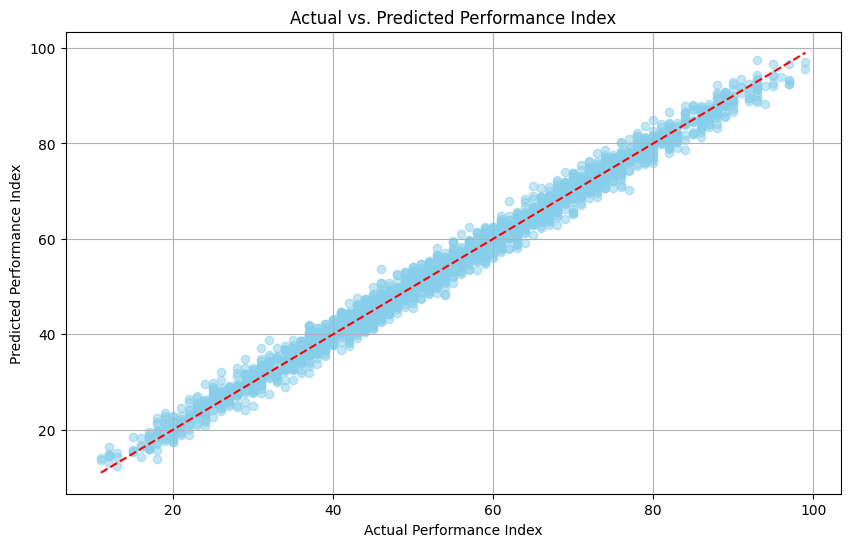

In [8]:
# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs. Predicted Performance Index")
plt.grid(True)


### Model Outcomes

#### 1. **OLS Model Summary**:
   - **R-squared**: 0.989 - Approximately 98.9% of the variance in the 'Performance Index' is explained by the predictors in our model.
   - **Adjusted R-squared**: 0.989
   - **Coefficients**:
     - **Hours Studied**: 2.8525
     - **Previous Scores**: 1.0170
     - **Extracurricular Activities**: 0.6086
     - **Sleep Hours**: 0.4769
     - **Sample Question Papers Practiced**: 0.1918
   - All predictors are statistically significant with p-values close to 0.

#### 2. **Linear Regression Model Performance**:  

 - The scatter plot showcases the actual vs. predicted performance index. The red dashed line represents a perfect prediction. As observed, most points are close to this line, indicating a good fit.
   
   - **Evaluation Metrics**:
     - **Mean Absolute Error (MAE)**: 1.6111 - On average, our predictions are about 1.6111 units away from the actual values.
     - **Mean Squared Error (MSE)**: 4.0826 - A metric that gives more weight to larger errors.
     - **R-squared (\( R^2 \))**: 0.9890 - Approximately 98.9% of the variance in the 'Performance Index' is explained by our model on the test set.

---


# Visualizing the relationship of Performance Index with all other factors

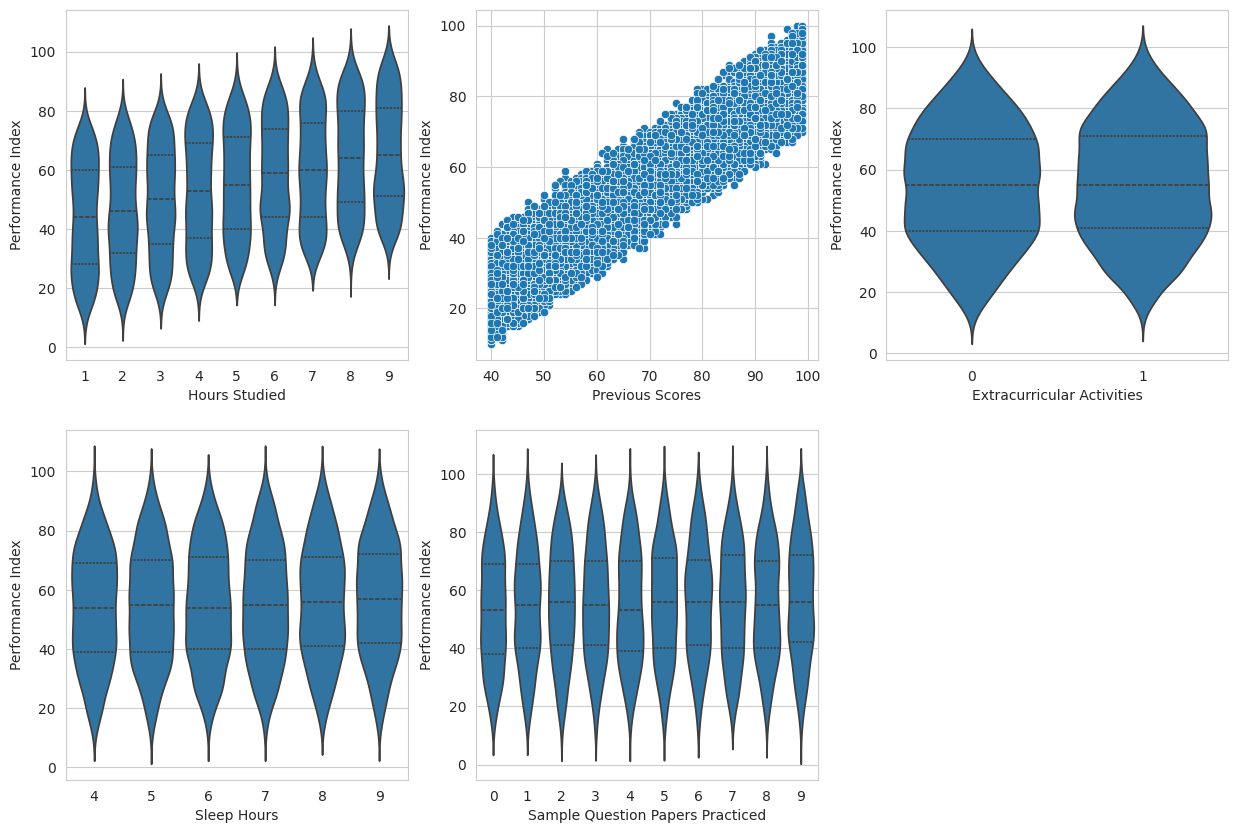

In [9]:
cols = data.drop('Performance Index', axis = 1).columns.tolist()

sns.set_style('whitegrid')
plt.figure(figsize = (15, 10))
num = 1
for col in cols:
    plt.subplot(2,3, num)
    if col == 'Previous Scores':
        sns.scatterplot(data = data,
                       x = col,
                       y = 'Performance Index')
        num += 1
        continue
    sns.violinplot(data = data,
                   x = col,
                   y = 'Performance Index',
                  inner = 'quartile')
    num +=1